In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
sys.path.append(os.path.abspath('../scripts'))

In [6]:
from Overview_Analysis import load_data_using_sqlalchemy, calculate_missing_percentage, drop_columns_with_missing_values, impute_numerical_columns, detect_and_remove_outliers
# from Satisfaction_Analysis import

In [7]:
query = "SELECT * FROM xdr_data;"  # Replace with your actual table name

# Load data from PostgreSQL using SQLAlchemy
df = load_data_using_sqlalchemy(query)

# Display the first few rows of the dataframe
if df is not None:
    print("Successfully loaded the data")
else:
    print("Failed to load data.")
    
df.sample(3)

Successfully loaded the data


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
136601,1.304243e+19,4/29/2019 1:08,90.0,4/30/2019 1:08,4.0,86399.0,2.082014e+14,3.366271e+10,8.637690e+13,D92949A,...,4039473.0,15116752.0,998321.0,14120242.0,170979300.0,870403.0,47318453.0,6737160.0,40738559.0,184221295.0
29245,1.311448e+19,4/24/2019 9:49,938.0,4/26/2019 18:13,2.0,203003.0,2.082015e+14,3.365006e+10,3.548281e+13,D53571C,...,9335533.0,8424755.0,8362009.0,4813806.0,127985660.0,10679053.0,738758887.0,7259608.0,34460881.0,149928513.0
10681,1.304243e+19,4/24/2019 17:05,36.0,4/25/2019 0:01,752.0,24987.0,2.082015e+14,3.366701e+10,3.590391e+13,D78467B,...,18539935.0,8060982.0,18589989.0,17200869.0,44795199.0,6571824.0,395035032.0,5318856.0,40247086.0,92978680.0
145501,1.311448e+19,4/29/2019 6:11,299.0,4/30/2019 6:15,288.0,86634.0,2.082014e+14,3.377112e+10,3.552201e+13,L76747B,...,18932503.0,4752547.0,11615296.0,21056912.0,729985599.0,10005657.0,336257966.0,1309208.0,39487736.0,771631074.0
145109,1.304243e+19,4/29/2019 5:58,600.0,4/30/2019 13:27,699.0,113345.0,2.082010e+14,3.362409e+10,3.595001e+13,D93624A,...,6205010.0,7223849.0,12584173.0,14853157.0,465958539.0,4604138.0,163864354.0,8042700.0,38177840.0,490233698.0
110198,1.311448e+19,4/27/2019 18:18,773.0,4/29/2019 9:01,684.0,139348.0,2.082009e+14,3.360828e+10,3.592221e+13,T79699B,...,17418919.0,18468904.0,11788533.0,3078473.0,564430461.0,9974991.0,68640413.0,12206686.0,44424399.0,606725154.0
140348,7.349883e+18,4/29/2019 3:29,268.0,4/30/2019 6:36,902.0,97619.0,2.082018e+14,3.366137e+10,3.540531e+13,L11756C,...,10327750.0,13002786.0,14021706.0,15585358.0,346374490.0,1738289.0,303815600.0,11909207.0,44063287.0,382140669.0


In [8]:
calculate_missing_percentage(df)

,Missing Values,Percentage
Bearer Id,991,0.660662
Start,1,0.000667
Start ms,1,0.000667
End,1,0.000667
End ms,1,0.000667
Dur. (ms),1,0.000667
IMSI,570,0.379997
MSISDN/Number,1066,0.710662
IMEI,572,0.381331
Last Location Name,1153,0.768662


In [9]:
df = drop_columns_with_missing_values(df)

Columns dropped: 10


In [11]:
df = impute_numerical_columns(df)
df = df.dropna()
df.sample(7)

Imputed missing values in the following columns: ['Start ms', 'End ms', 'Dur. (ms)', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)', 'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)', 'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1', 'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B', 'Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)', 'Total UL (Bytes)', 'Total DL (Bytes)']


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
46031,7.349883e+18,4/25/2019 7:04,725.0,4/26/2019 14:02,524.0,111508.0,2.082003e+14,3.366191e+10,3.548661e+13,D94332C,...,2959280.0,13534662.0,624859.0,401441.0,172586882.0,8638829.0,344712806.0,1769770.0,28044629.0,183688133.0
146894,7.349883e+18,4/29/2019 6:45,719.0,4/30/2019 14:35,420.0,114580.0,2.082021e+14,3.362747e+10,8.666840e+13,T10694C,...,4792772.0,6727801.0,3576512.0,8930026.0,151619366.0,9024020.0,600644499.0,16000574.0,44363696.0,168468543.0
36172,1.304243e+19,4/25/2019 1:33,130.0,4/26/2019 1:33,700.0,86400.0,2.082019e+14,3.366695e+10,8.637690e+13,T88705B,...,4517045.0,1004246.0,12550609.0,6952600.0,64750717.0,5594952.0,357278839.0,5367169.0,19942464.0,85433731.0
51034,7.349883e+18,4/24/2019 7:57,950.0,4/27/2019 8:22,40.0,260688.0,2.082017e+14,3.368242e+10,3.537991e+13,L12741B,...,3589503.0,20654873.0,1801588.0,7231742.0,771057643.0,3700751.0,753232777.0,1889859.0,37005956.0,787459160.0
60579,1.304243e+19,4/26/2019 3:42,64.0,4/27/2019 3:42,65.0,86400.0,2.082018e+14,3.366553e+10,8.637690e+13,D83942B,...,5197784.0,14418812.0,1198252.0,2564888.0,249278128.0,9621588.0,613771554.0,3054075.0,30458273.0,261497456.0
73374,7.277826e+18,4/26/2019 8:52,387.0,4/27/2019 8:52,427.0,86400.0,2.082015e+14,3.366856e+10,3.552301e+13,D10340C,...,16908116.0,18436025.0,9150889.0,1281643.0,475934588.0,9024686.0,11562524.0,9310189.0,41296151.0,510167065.0
59934,1.304243e+19,4/26/2019 2:48,772.0,4/27/2019 2:48,772.0,86400.0,2.082019e+14,3.376374e+10,8.637690e+13,T72899B,...,164012.0,19023916.0,14551792.0,7579924.0,665417646.0,2043779.0,749225243.0,12237268.0,42116499.0,684479445.0


In [17]:
numeric_columns = ['Dur. (ms).1', 'Activity Duration UL (ms)', 'Activity Duration DL (ms)',
    'UL TP > 300 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)',
    '10 Kbps < UL TP < 50 Kbps (%)', 'UL TP < 10 Kbps (%)',
    'DL TP > 1 Mbps (%)', '250 Kbps < DL TP < 1 Mbps (%)',
    '50 Kbps < DL TP < 250 Kbps (%)', 'DL TP < 50 Kbps (%)',
    'Avg Bearer TP UL (kbps)', 'Avg Bearer TP UL (kbps)',
    'Avg RTT UL (ms)', 'Avg RTT DL (ms)', 'Dur. (ms)',
    'End ms', 'Start ms', 'Social Media DL (Bytes)', 
    'Social Media UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
    'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Google DL (Bytes)', 
    'Google UL (Bytes)', 'Email DL (Bytes)', 'Email UL (Bytes)', 
    'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)', 
    'Other UL (Bytes)']

df_cleaned = detect_and_remove_outliers(df, numeric_columns)

Number of outliers removed: 18751


In [18]:
engagement_data = df_cleaned.copy
experience_data = df_cleaned.copy

In [27]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances

# Assume df_cleaned is your cleaned dataset with engagement and experience data
# Convert engagement and experience data to numpy arrays

# Selecting columns that could represent engagement, such as usage of social media, YouTube, and Netflix
engagement_data = df_cleaned[['Social Media DL (Bytes)', 'Youtube DL (Bytes)', 'Netflix DL (Bytes)']].to_numpy()

# Selecting columns that could represent experience, such as network performance metrics
experience_data = df_cleaned[['Avg RTT DL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']].to_numpy()

# K-Means for engagement analysis (e.g., 3 clusters)
kmeans_engagement = KMeans(n_clusters=3, random_state=42)
kmeans_engagement.fit(engagement_data)
engagement_centroids = kmeans_engagement.cluster_centers_

# Identify the less engaged cluster (assumed to be cluster 0)
less_engaged_centroid = engagement_centroids[0]

# K-Means for experience analysis (e.g., 3 clusters)
kmeans_experience = KMeans(n_clusters=3, random_state=42)
kmeans_experience.fit(experience_data)
experience_centroids = kmeans_experience.cluster_centers_

# Identify the worst experience cluster (assumed to be cluster 1)
worst_experience_centroid = experience_centroids[1]

# Function to calculate engagement and experience scores for a single user
def calculate_scores(user_data_engagement, user_data_experience, less_engaged_centroid, worst_experience_centroid):
    # Calculate the engagement score: Euclidean distance to less engaged cluster
    engagement_score = euclidean_distances([user_data_engagement], [less_engaged_centroid])[0][0]

    # Calculate the experience score: Euclidean distance to worst experience cluster
    experience_score = euclidean_distances([user_data_experience], [worst_experience_centroid])[0][0]

    return engagement_score, experience_score

# Lists to hold engagement and experience scores for all users
engagement_scores = []
experience_scores = []

# Calculate scores for each user in the dataset
for i in range(len(engagement_data)):
    user_data_engagement = engagement_data[i]
    user_data_experience = experience_data[i]
    
    # Calculate engagement and experience scores for the current user
    engagement_score, experience_score = calculate_scores(user_data_engagement, user_data_experience, less_engaged_centroid, worst_experience_centroid)
    
    engagement_scores.append(engagement_score)
    experience_scores.append(experience_score)

# Add the calculated scores to the DataFrame
df_cleaned.loc[:, 'Engagement Score'] = engagement_scores
df_cleaned.loc[:, 'Experience Score'] = experience_scores

# Display the first few rows with the new scores
print(df_cleaned[['Engagement Score', 'Experience Score']])


        Engagement Score  Experience Score
62          1.149825e+07      19932.712722
65          2.047505e+06      34445.180475
66          5.903568e+06      34429.162330
67          3.471186e+06      34481.835635
68          1.121568e+07      23849.395473
...                  ...               ...
149994      1.173240e+07      34437.093045
149996      5.184951e+06      34439.079504
149997      2.672915e+06      34468.986708
149998      1.428975e+07      34449.706984
149999      1.559658e+07      34459.612470

[129595 rows x 2 columns]


In [28]:
# Calculate the satisfaction score as the average of engagement and experience scores
df_cleaned['Satisfaction Score'] = df_cleaned[['Engagement Score', 'Experience Score']].mean(axis=1)

# Sort the DataFrame by the satisfaction score in ascending order (lower is better)
top_10_satisfied_customers = df_cleaned.sort_values(by='Satisfaction Score', ascending=True).head(10)

# Display the top 10 satisfied customers
print(top_10_satisfied_customers[['Bearer Id', 'Satisfaction Score']])


C:\Users\ephre\AppData\Local\Temp\ipykernel_24224\97389433.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Satisfaction Score'] = df_cleaned[['Engagement Score', 'Experience Score']].mean(axis=1)


           Bearer Id  Satisfaction Score
62220   7.349883e+18        73650.205263
75787   1.311448e+19       116205.194743
60481   1.311448e+19       122757.050004
128639  1.311448e+19       148526.871170
148099  7.277826e+18       152420.920768
88057   1.304243e+19       154105.809989
129573  7.349883e+18       185142.439741
49236   7.349883e+18       194573.920512
114485  7.277826e+18       200626.690443
18746   1.304243e+19       211683.887567


In [29]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df_cleaned contains the relevant features and 'Satisfaction Score'
# Features selection (You can customize this based on your dataset)
features = ['Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 
            'Avg Bearer TP UL (kbps)', 'DL TP < 50 Kbps (%)', 'UL TP < 10 Kbps (%)', 
            'Handset Manufacturer', 'Handset Type']  # Replace with relevant columns

# Target variable
target = 'Satisfaction Score'

# Prepare the feature matrix (X) and target vector (y)
X = df_cleaned[features]
y = df_cleaned[target]

# Convert categorical variables to dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-Squared Score: {r2}")

# Show feature importance (optional, to interpret the model)
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
print(feature_importance.sort_values(ascending=False))


Mean Squared Error: 6636709768334.901
R-Squared Score: -0.10446926348756946
Avg Bearer TP DL (kbps)                        0.216872
Avg Bearer TP UL (kbps)                        0.187356
Avg RTT DL (ms)                                0.173221
Avg RTT UL (ms)                                0.107493
DL TP < 50 Kbps (%)                            0.040780
                                                 ...   
Handset Type_Sfr Altice S11                    0.000000
Handset Type_Sfr Star Trail 5 By Sfr           0.000000
Handset Type_Shenzhen City Ra. Mos1            0.000000
Handset Type_Shenzhen Leagoo. Leagoo M9 Pro    0.000000
Handset Type_Samsung Gt-C3590                  0.000000
Length: 1478, dtype: float64


C:\Users\ephre\AppData\Local\Temp\ipykernel_24224\3896846968.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cluster'] = kmeans.fit_predict(data_scaled)


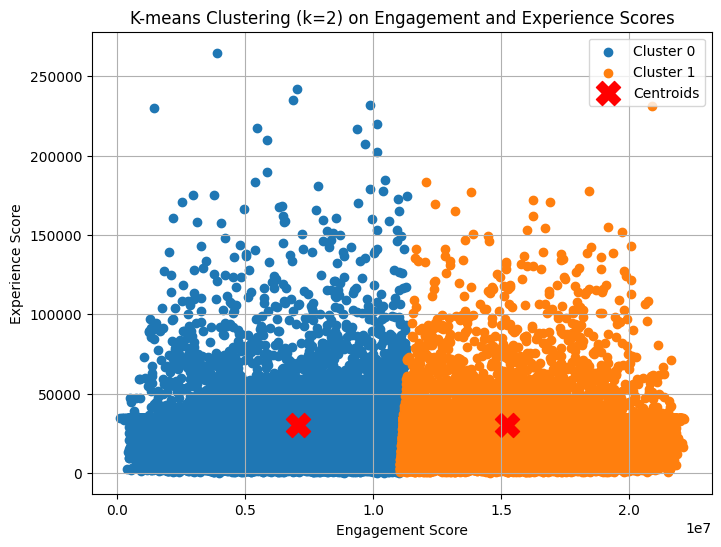

           Bearer Id            Start  Start ms              End  End ms  \
62      1.304243e+19   4/21/2019 2:55      73.0   4/25/2019 0:17   262.0   
65      1.311448e+19   4/21/2019 8:26     605.0   4/25/2019 1:20   655.0   
66      7.349883e+18   4/21/2019 8:54     105.0   4/25/2019 0:48   931.0   
67      1.311448e+19   4/21/2019 9:19     590.0   4/25/2019 4:42   965.0   
68      1.304243e+19  4/21/2019 10:09       1.0   4/25/2019 1:39   272.0   
...              ...              ...       ...              ...     ...   
149994  1.311448e+19   4/29/2019 7:28      83.0  4/30/2019 15:01   268.0   
149996  7.277826e+18   4/29/2019 7:28     451.0   4/30/2019 6:02   214.0   
149997  7.349883e+18   4/29/2019 7:28     483.0  4/30/2019 10:41   187.0   
149998  1.311448e+19   4/29/2019 7:28     283.0  4/30/2019 10:46   810.0   
149999  1.311448e+19   4/29/2019 7:28     696.0  4/30/2019 10:40   327.0   

        Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
62       336160.0  2.08

In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Prepare the Data
# Assuming you have a DataFrame with engagement and experience scores
# Replace this with your actual DataFrame
data = df_cleaned

# Step 2: Normalize the Data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['Engagement Score', 'Experience Score']])

# Step 3: Run K-means (k=2)
kmeans = KMeans(n_clusters=2, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)

# Step 4: Visualize the Clusters
plt.figure(figsize=(8, 6))

# Plot each cluster with different colors
for cluster in np.unique(data['Cluster']):
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['Engagement Score'], cluster_data['Experience Score'], label=f'Cluster {cluster}')

# Plot centroids
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')

# Plot details
plt.title('K-means Clustering (k=2) on Engagement and Experience Scores')
plt.xlabel('Engagement Score')
plt.ylabel('Experience Score')
plt.legend()
plt.grid(True)
plt.show()

# Optional: Display the cluster assignments
print(data)
